# Jakub Bandurski, Michał Bryzik, Kacper Gruca
## Text Mining and Social Media Mining Project

In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
df = pd.read_pickle('../data/tifu_cleaned_2.pkl')
df.head()

,ups,num_comments,upvote_ratio,score,documents_stemmed,documents_lem,documents_stem_lem
0,115.0,23.0,0.88,115.0,actual happen coupl year ago grew germani went...,actually happen couple year ago grow germany g...,actual happen coupl year ago grow germani go g...
1,16.0,12.0,0.79,16.0,last octob 'm feel fallout mom die cancer last...,last october 'm feel fallout mom die cancer la...,last octob 'm feel fallout mom die cancer last...
2,55.0,10.0,0.85,55.0,brilliant idea use veet hair remov gel ol ' da...,brilliant idea use veet hair removal gel ol ' ...,brilliant idea use veet hair remov gel ol ' da...
3,90.0,20.0,0.92,90.0,go bath long day paint kid face carniv would g...,go bath long day painting kid face carnival wo...,go bath long day paint kid face carniv would g...
4,81.0,18.0,0.79,81.0,n't bath practic year final move hous bath dec...,n't bath practically year finally move house b...,n't bath practic year final move hous bath dec...


### Visualize word cloud from documents column (clustering df)

We plot 3 wordclouds and 3 charts with number of the most frequent words to compare the differences according to the method applied to format the text.

In [18]:
# Function to generate a word cloud
def generate_wordcloud(data, title):
    long_string = ','.join(list(data.values))
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    wordcloud.generate(long_string)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)

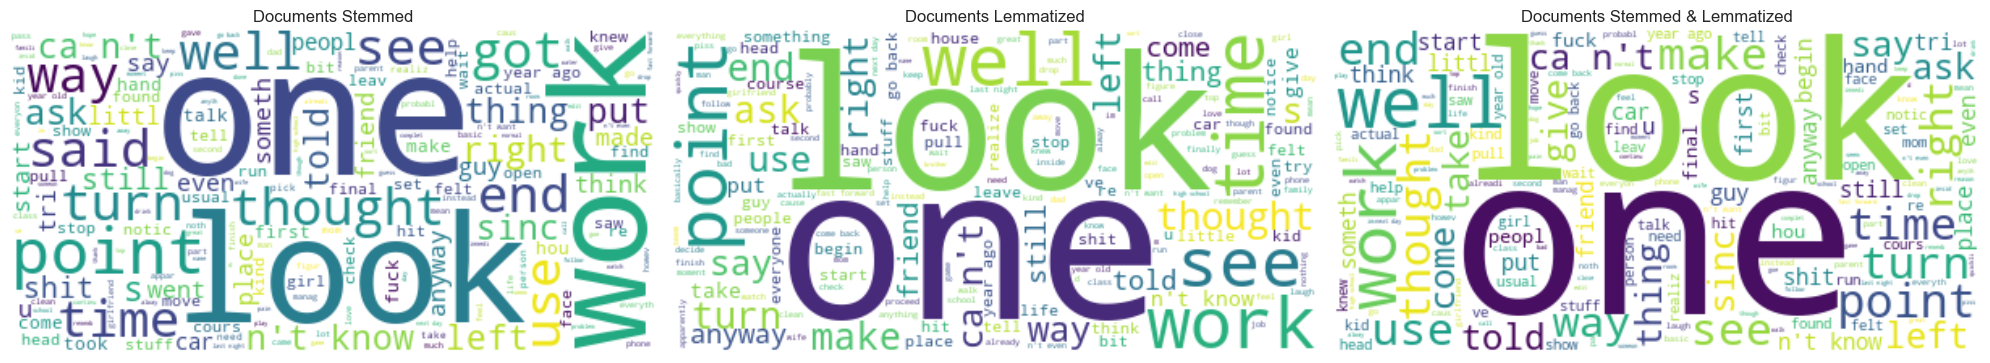

In [19]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Generate and display the word cloud for 'documents_lem'
plt.subplot(1, 3, 1) # 1 row, 3 cols, 1st subplot
generate_wordcloud(df['documents_stemmed'], 'Documents Stemmed')

# Generate and display the word cloud for 'column2'
plt.subplot(1, 3, 2) # 1 row, 3 cols, 2nd subplot
generate_wordcloud(df['documents_lem'], 'Documents Lemmatized')

# Generate and display the word cloud for 'column3'
plt.subplot(1, 3, 3) # 1 row, 3 cols, 3rd subplot
generate_wordcloud(df['documents_stem_lem'], 'Documents Stemmed & Lemmatized')

# Show the plots
plt.tight_layout()
plt.show()

### Visualize the most frequent words in documents column (clustering df)

In [20]:
# Define function to plot most common words from specific column

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

def plot_10_most_common_words(count_data, count_vectorizer, col_name_title):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words in ' + col_name_title)


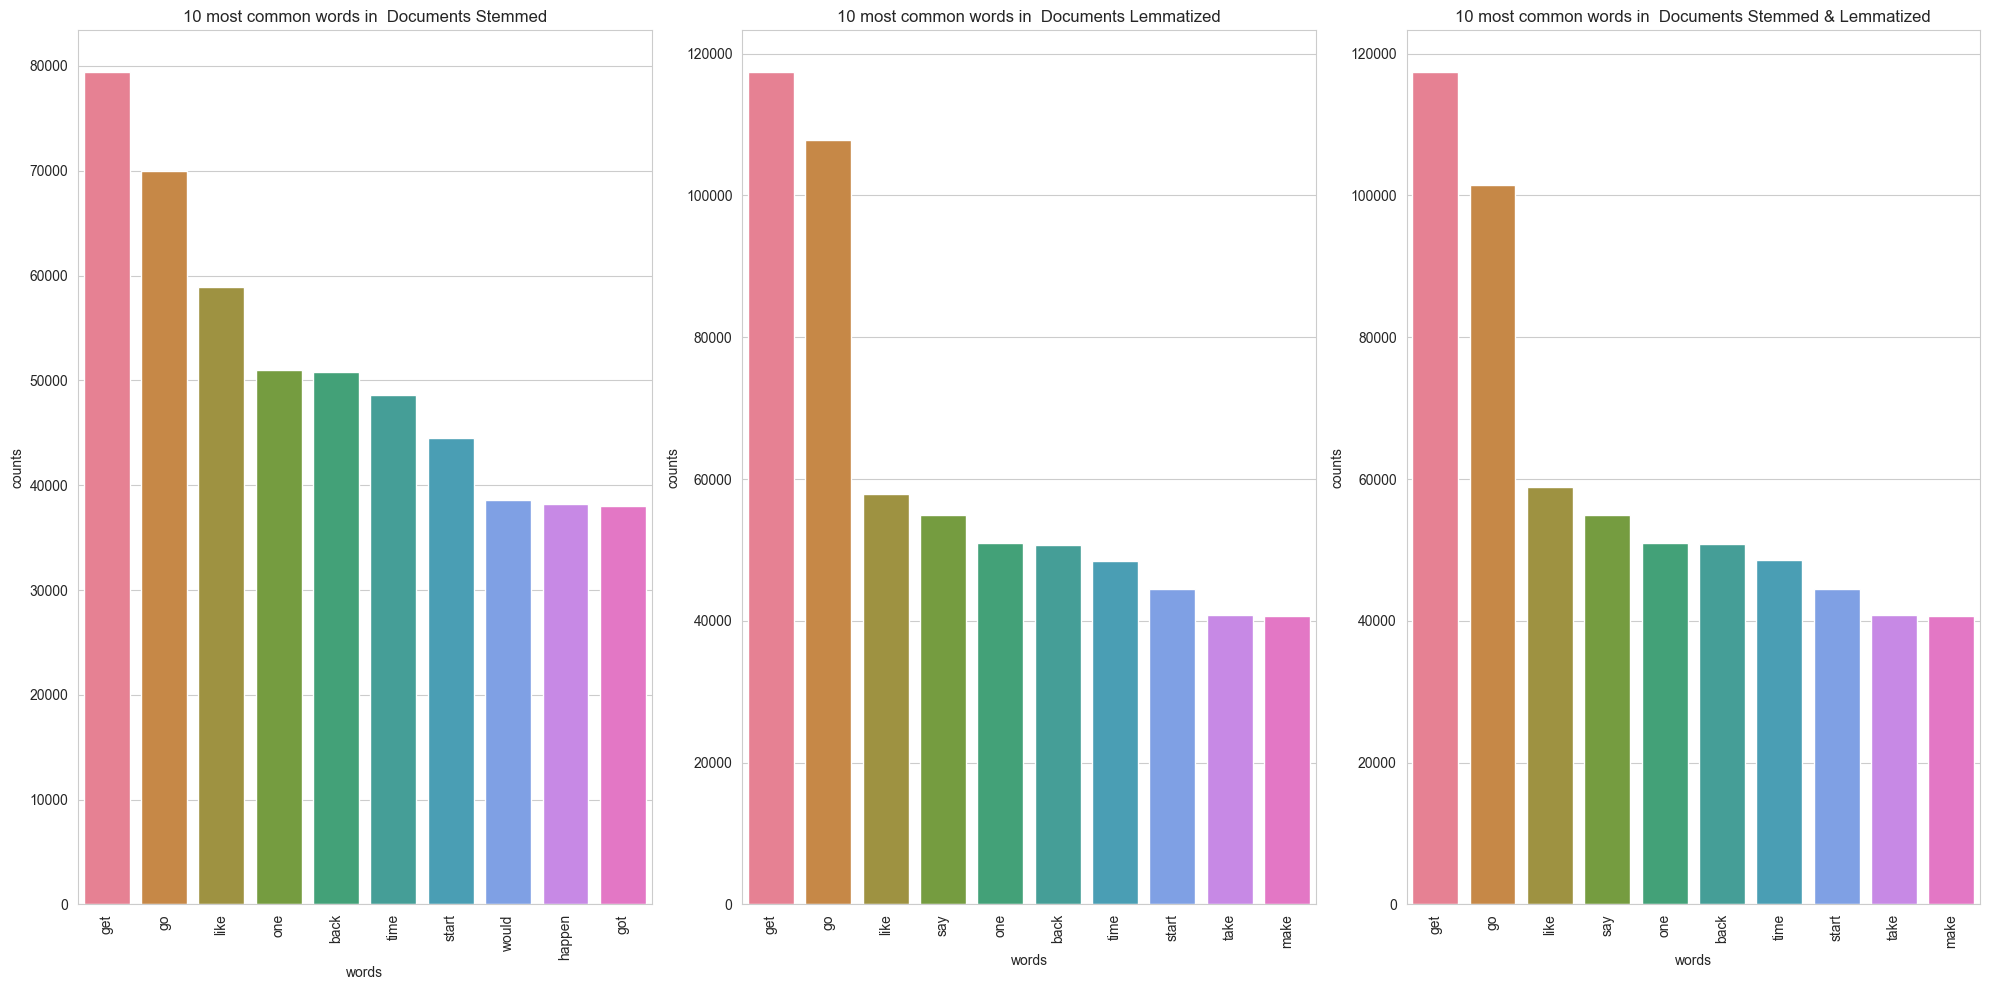

In [21]:
count_vectorizer = CountVectorizer()
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

count_data = count_vectorizer.fit_transform(df['documents_stemmed'])
plt.subplot(1, 3, 1) # 1 row, 3 cols, 1st subplot
plot_10_most_common_words(count_data, count_vectorizer, " Documents Stemmed")

count_data = count_vectorizer.fit_transform(df['documents_lem'])
plt.subplot(1, 3, 2) # 1 row, 3 cols, 2nd subplot
plot_10_most_common_words(count_data, count_vectorizer, " Documents Lemmatized")


count_data = count_vectorizer.fit_transform(df['documents_stem_lem'])
plt.subplot(1, 3, 3) # 1 row, 3 cols, 3rd subplot
plot_10_most_common_words(count_data, count_vectorizer, " Documents Stemmed & Lemmatized")


# Show the plots
plt.tight_layout()
plt.show()

### Visualize word cloud from body column (classification df)

In this case we do plot just the body column, where were applied both Stemming & Lemmatization.

In [22]:
df = pd.read_pickle("../data/nsfw_cleaned.pkl")

In [23]:
df.head()

,body,numberOfComments,over18,upVotes
0,didnt happen like year ago feel like fever dre...,95,False,392
1,f alway say 's ugli old stuff like nobodi like...,244,True,867
2,hi im f dental assist clean accident get prick...,265,False,920
3,context wife f parent beauti toddler ym f rent...,138,True,1372
4,yesterday 's fuckup spill go crazi f frequent ...,31,False,45


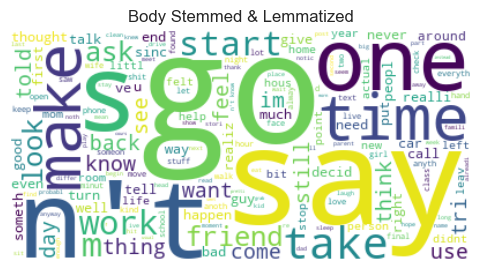

In [24]:
plt.figure(figsize=(8, 3))

generate_wordcloud(df['body'], 'Body Stemmed & Lemmatized')

### Visualize the most frequent words in body column (classification df)

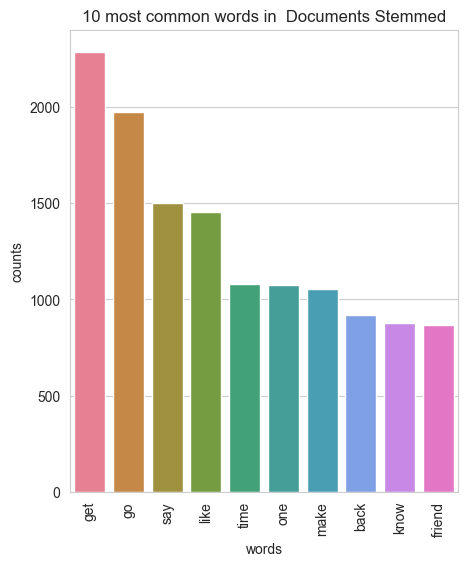

In [25]:
count_vectorizer = CountVectorizer()
count_data = count_vectorizer.fit_transform(df['body'])

plt.figure(figsize=(5, 6))
plot_10_most_common_words(count_data, count_vectorizer, " Documents Stemmed")